<font size="1">Copyright 2021, by the California Institute of Technology. ALL RIGHTS RESERVED. United States Government sponsorship acknowledged. Any commercial use must be negotiated with the Office of Technology Transfer at the California Institute of Technology.</font>
    
<font size="1">This software may be subject to U.S. export control laws and regulations. By accepting this document, the user agrees to comply with all applicable U.S. export laws and regulations. User has the responsibility to obtain export licenses, or other export authority as may be required, before exporting such information to foreign countries or providing access to foreign persons.<font>

## Plotting examples

This notebook provides simple examples of how to plot using various packages & functions. It is a work in progress and will be expanded upon over time.

The following cell must always be run first.

In [9]:
import os

# this block makes sure the directory set-up/change is only done once and relative to the notebook's directory
try:
    start_dir
except NameError:
    start_dir = os.getcwd()
    output_dir = os.path.join(start_dir,'notebook_output','plotting')
    !mkdir -p $output_dir
    os.chdir(output_dir)

output_dir = os.path.join(start_dir,'notebook_output','plotting')
python_dir = os.path.join(start_dir, 'python')

### matplotlib - amplitude/phase
As demonstrated in notebook 03-ISCE3-L1-L-RSLC

/home/jovyan/nisar-on-demand-use-cases/notebook_output/plotting/ALPSRP037370690
2021-07-07 23:23:14.250, WARNING, RSLC, focus, 999999, /opt/conda/lib/python3.8/site-packages/pybind_nisar/workflows/focus.py:65, "Skipping input validation."
2021-07-07 23:23:14.250, INFO, RSLC, focus, 999999, /opt/conda/lib/python3.8/site-packages/pybind_nisar/workflows/focus.py:689, "Logging configuration to file output_rslc/rslc_config.yaml."
2021-07-07 23:23:14.259, INFO, RSLC, Raw, 999999, /opt/conda/lib/python3.8/site-packages/pybind_nisar/products/readers/Raw/Raw.py:35, "Reading L0B file /home/jovyan/nisar-on-demand-use-cases/notebook_output/plotting/ALPSRP037370690/input/ALPSRP037370690.L0B.h5"
2021-07-07 23:23:14.265, WARNING, RSLC, focus, 999999, /opt/conda/lib/python3.8/site-packages/pybind_nisar/workflows/focus.py:192, "No DEM given, using height=0."
2021-07-07 23:23:14.265, INFO, RSLC, focus, 999999, /opt/conda/lib/python3.8/site-packages/pybind_nisar/workflows/focus.py:113, "Loading orbit"
20

2021-07-07 23:23:25.720, INFO, RSLC, focus, 999999, /opt/conda/lib/python3.8/site-packages/pybind_nisar/workflows/focus.py:619, "Writing range compressed data to /home/jovyan/nisar-on-demand-use-cases/notebook_output/plotting/ALPSRP037370690/scratch_rslc/tmpw6l_l582_rc.c8"
2021-07-07 23:23:25.733, INFO, RSLC, focus, 999999, /opt/conda/lib/python3.8/site-packages/pybind_nisar/workflows/focus.py:621, "Range compressed data shape = (30540, 7908)"
2021-07-07 23:23:25.733, INFO, RSLC, focus, 999999, /opt/conda/lib/python3.8/site-packages/pybind_nisar/workflows/focus.py:624, "Range compressing block at pulse 0"
2021-07-07 23:23:25.792, INFO, RSLC, focus, 999999, /opt/conda/lib/python3.8/site-packages/pybind_nisar/workflows/focus.py:624, "Range compressing block at pulse 1024"
2021-07-07 23:23:25.895, INFO, RSLC, focus, 999999, /opt/conda/lib/python3.8/site-packages/pybind_nisar/workflows/focus.py:624, "Range compressing block at pulse 2048"
2021-07-07 23:23:25.952, INFO, RSLC, focus, 999999,

2021-07-07 23:23:36.465, DEBUG, RSLC, focus, 999999, /opt/conda/lib/python3.8/site-packages/pybind_nisar/workflows/focus.py:655, "max(abs(z)) = 49.474876403808594"
2021-07-07 23:23:36.466, INFO, RSLC, focus, 999999, /opt/conda/lib/python3.8/site-packages/pybind_nisar/workflows/focus.py:648, "Azcomp block at (i, j) = (256, 128)"
2021-07-07 23:23:37.457, DEBUG, RSLC, focus, 999999, /opt/conda/lib/python3.8/site-packages/pybind_nisar/workflows/focus.py:655, "max(abs(z)) = 38.3056755065918"
2021-07-07 23:23:37.458, INFO, RSLC, focus, 999999, /opt/conda/lib/python3.8/site-packages/pybind_nisar/workflows/focus.py:648, "Azcomp block at (i, j) = (256, 256)"
2021-07-07 23:23:38.271, DEBUG, RSLC, focus, 999999, /opt/conda/lib/python3.8/site-packages/pybind_nisar/workflows/focus.py:655, "max(abs(z)) = 35.1069450378418"
2021-07-07 23:23:38.272, INFO, RSLC, focus, 999999, /opt/conda/lib/python3.8/site-packages/pybind_nisar/workflows/focus.py:648, "Azcomp block at (i, j) = (256, 384)"
2021-07-07 23:

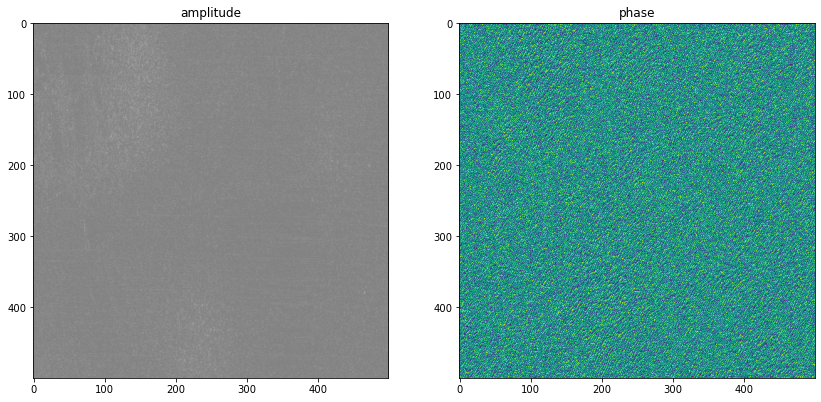

In [5]:
!curl -O https://artifactory.jpl.nasa.gov/artifactory/general-develop/gov/nasa/jpl/nisar/adt/r1.1/Data_RSLC/ALPSRP037370690.tar.gz
!tar xvfz ALPSRP037370690.tar.gz

%cd ALPSRP037370690

!/opt/conda/bin/python3 /opt/conda/lib/python3.8/site-packages/pybind_nisar/workflows/focus.py run_config_rslc.yaml
!gdal_translate -of ENVI HDF5:"output_rslc/rslc.h5"://science/LSAR/RSLC/swaths/frequencyA/HH HH.slc

import numpy as np
import gdal
import matplotlib.pyplot as plt

ds = gdal.Open("HH.slc", gdal.GA_ReadOnly)
print (ds)
# extract a subset of the SLC to display
x0 = 0
y0 = 10
# x_offset = 1000
# y_offset = 1000
x_offset = 500
y_offset = 500

               
slc = ds.GetRasterBand(1).ReadAsArray(x0, y0, x_offset, y_offset)
print(slc)
ds = None

fig = plt.figure(figsize=(14, 12))

# display amplitude of the slc
ax = fig.add_subplot(1,2,1)
ax.imshow(np.abs(slc), vmin = -2, vmax=2, cmap='gray')
ax.set_title("amplitude")

#display phase of the slc
ax = fig.add_subplot(1,2,2)
ax.imshow(np.angle(slc))
ax.set_title("phase")

plt.show()

slc = None

### matplotlib - contours
As demonstrated in notebook 04-NISAR_DEM_notebook

Be sure your AWS credentails are valid.

/home/jovyan/nisar-on-demand-use-cases/notebook_output/plotting
--2021-07-07 23:44:04--  https://artifactory.jpl.nasa.gov/artifactory/general-develop/gov/nasa/jpl/nisar/adt/r1/Data_GSLC_GCOV/UAVSAR_SanAnd.tar.gz!/UAVSAR_SanAnd/input/SanAnd_05024_18038_006_180730_L090_CX_129_05.h5
Resolving artifactory.jpl.nasa.gov (artifactory.jpl.nasa.gov)... 100.65.49.230, 100.65.48.236, 100.65.49.22, ...
Connecting to artifactory.jpl.nasa.gov (artifactory.jpl.nasa.gov)|100.65.49.230|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 275240972 (262M) [application/octet-stream]
Saving to: ‘SanAnd_05024_18038_006_180730_L090_CX_129_05.h5.1’

100%[======================================>] 275,240,972 4.48MB/s   in 64s    

2021-07-07 23:45:24 (4.10 MB/s) - ‘SanAnd_05024_18038_006_180730_L090_CX_129_05.h5.1’ saved [275240972/275240972]

Determining DEM perimeter
Determine perimeter from SLC radar grid
box_min : { "type": "LineString", "coordinates": [ [ -121.951318853708372, 36.3103

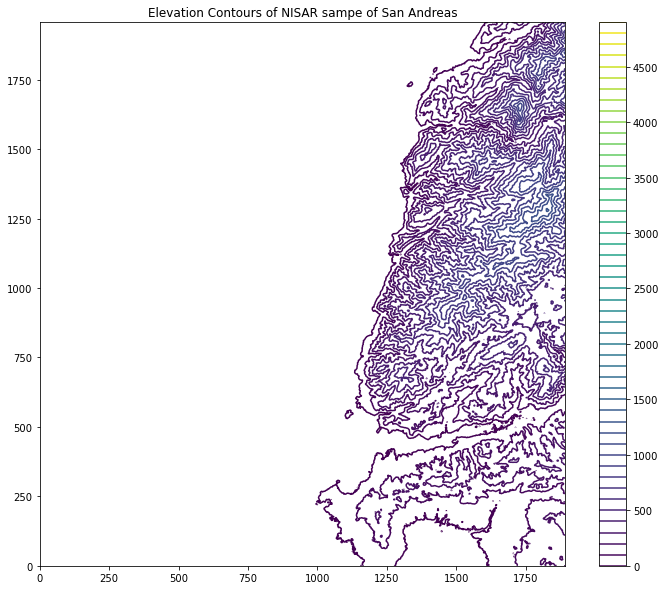

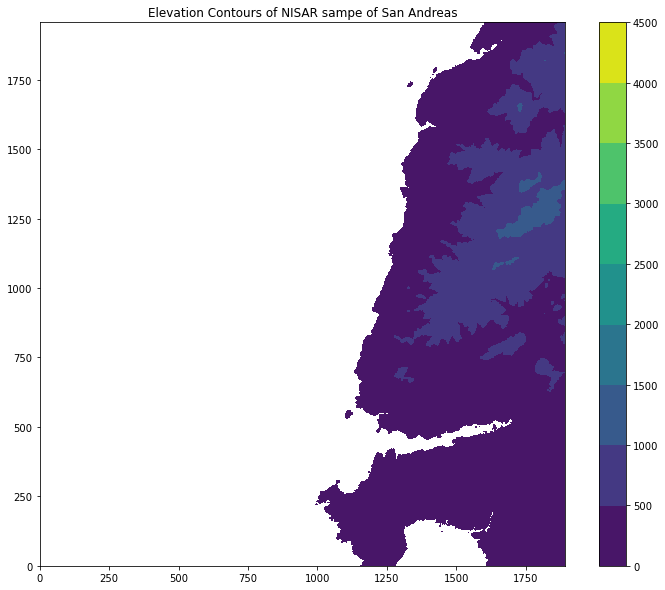

In [11]:
%cd $output_dir

url = 'https://artifactory.jpl.nasa.gov/artifactory/general-develop/gov/nasa/jpl/nisar/adt/r1/Data_GSLC_GCOV/UAVSAR_SanAnd.tar.gz!/UAVSAR_SanAnd/input/SanAnd_05024_18038_006_180730_L090_CX_129_05.h5'
!wget $url
h5_file = url.split('/')[-1]

!python $python_dir/DEM.py --product $h5_file

filename = "dem.tif"
gdal_data = gdal.Open(filename)
gdal_band = gdal_data.GetRasterBand(1)
nodataval = gdal_band.GetNoDataValue()

# convert to a numpy array
data_array = gdal_data.ReadAsArray().astype(np.float)

# replace missing values if necessary
if np.any(data_array == nodataval):
    data_array[data_array == nodataval] = np.nan
    
#Plot out data with Matplotlib's 'contour'
fig = plt.figure(figsize = (12, 10))
# ax = fig.add_subplot(111)
plt.contour(data_array, 
            cmap = "viridis", 
            levels = list(range(0, 5000, 100))
           )
plt.title("Elevation Contours of NISAR sampe of San Andreas")
cbar = plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

#Plot our data with Matplotlib's 'contourf'
fig = plt.figure(figsize = (12, 10))
ax = fig.add_subplot(111)
plt.contourf(data_array, 
             cmap = "viridis", 
             levels = list(range(0, 5000, 500))
            )
plt.title("Elevation Contours of NISAR sampe of San Andreas")
cbar = plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

### Insert plots from LostHills time series here.